In [1]:

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

# K-means

Hard-clustering method for grouping dat into clusters of similar data points with similar variances

- Mathematically strightforward, computationally intensive
- Chooses centroids (means) to minimize the inertia (cost function)
- Formula for inertia: $$\sum(\bar{x}_c - x_i)^2$$
    - sum of squared differences between centroid (the mean $\bar{x}_c$) and the datapoints in the cluster ($x_i$)
    - The goal is to define cluster means so that the distance between a cluster mean and all data points in that cluster is as small as possible
- In K-means, the means refer to the centroids, and k is the (user provided) number of centroids (and thus the number of clusters)
- Choosing k is basically trial and error
    - pick a k, look at solution, see if it makes sense, then try other k's
    - Clusters on 'real divisions' will be stable across train and test sets
    
 

## K-means algorithm
- iterative algorithim that eventually converges on a solution
- Starts with random choice of k-centroids, then..
    1. Assigns each data point to the nearest centroid
    2. Create new centroids by taking mean of all the data points assigned to each centroid
    3. Algorithm stops when the difference between old and new centroids is lower than a given threshold 
- bad starting centroid values can cause k-means to arrive at suboptimal solution
- should try the algorithim a few times with different starting centroids
    - sklearn has a kmeans++ options for initializing centroids that are distant from each other
    - This is less likely to end in a flawed solution
    
### Assumptions of k-means
- assumes underlying 'true' clusters are radially symmetrical (isotropic)
    - uniform in all directions
    - edges curve outward
- also assumes all clusters have similar variances

### Speed
k-means runs more slowly on high dimensional data
- computationally demanding to measure distance between data point and mean in high dimensional spaces
- can run PCA first and run k-mean son reduced data
- Alternatively, can use sklearn's MiniBatchKmeans
    - randomly samples subsets of the training data in each iteration
    - will not produce as optimal solution as regular k-means, but much faster
    
    

## Applying k-means on heart disease data:

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv',
    header=None, error_bad_lines=False
)

#define features and outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

#impute 0 for missing values (marked with ? in this data)
X = X.replace(to_replace='?', value=0)

#binarize y so that 1 means heart disease diagnosis, 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [29]:
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [35]:
pca.components_

array([[ 5.45245829e-02,  2.96708281e-03,  1.97236568e-03,
         3.41368008e-01, -6.31629204e-01,  5.25793614e-04,
        -2.56988845e-03,  6.93873620e-01, -2.35961665e-03,
        -1.95783386e-03,  1.27914036e-03, -4.13457791e-03,
         5.58525342e-03],
       [ 3.19182374e-01,  2.16713349e-03,  1.47530823e-02,
         7.53244201e-01, -1.67404665e-01,  2.48494741e-03,
         6.84807456e-03, -5.48211511e-01,  6.23704612e-03,
         2.19160102e-02,  1.28829964e-02,  1.15167092e-02,
         3.30509277e-02]])

In [31]:
X_pca.shape

(303, 2)

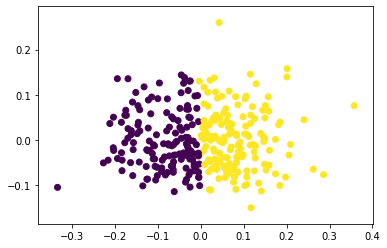

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [34]:
# normalize data
X_norm = normalize(X)

# PCA to 2 components
pca = PCA(2)
X_pca= pca.fit_transform(X_norm)


# Calculate predicted values
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# plot solution:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Looks like this model isn't doing very well. We're correctly classifying 183 cases, but mis-classifying 120 of the cases!

Now let's try MiniBatch:

In [27]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      145    0
1        4  154


## Drill: more clusters?
Your task is to take the k-means code here and see what happens when you change the value of k. What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

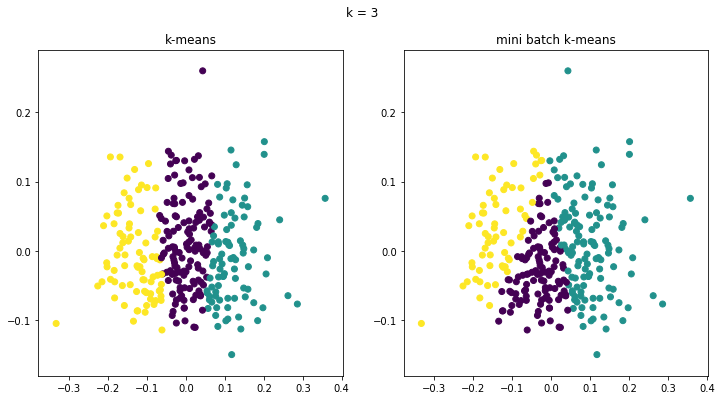

comparing k-means clusters against the data
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33

comparing k-means and mini batch k-means solutions
col_0   0   1   2
row_0            
0      87   0  28
1      38  86   0
2      10   0  54


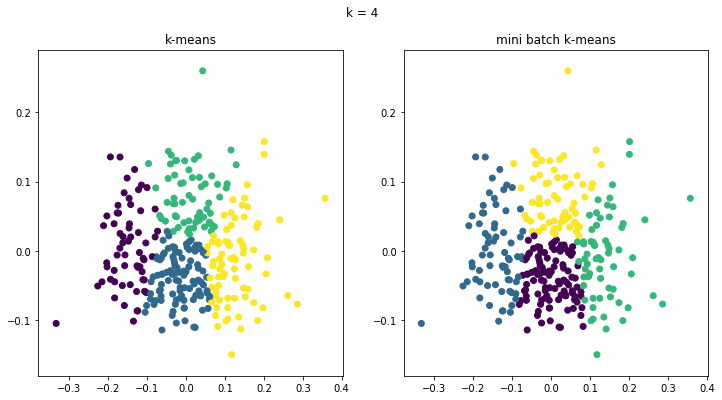

comparing k-means clusters against the data
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3
row_0                
0       0  95   0  11
1      61   8   0   0
2       0   0   0  64
3       0   1  62   1


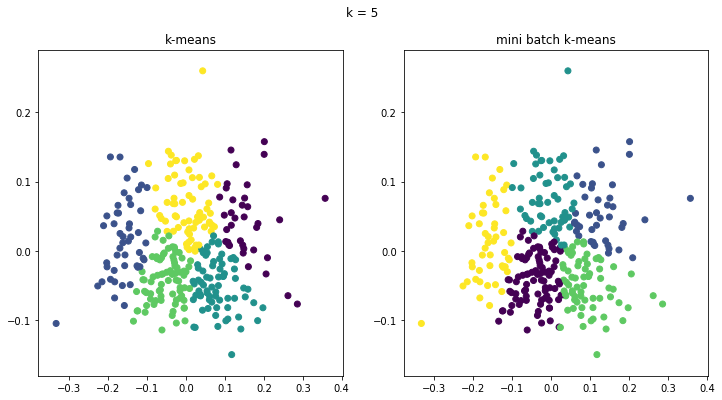

comparing k-means clusters against the data
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4
row_0                    
0       0   0   5  77   6
1      32   0   1   0   8
2       0   1   0   0  54
3       4   0  66   0   0
4       0  47   0   2   0


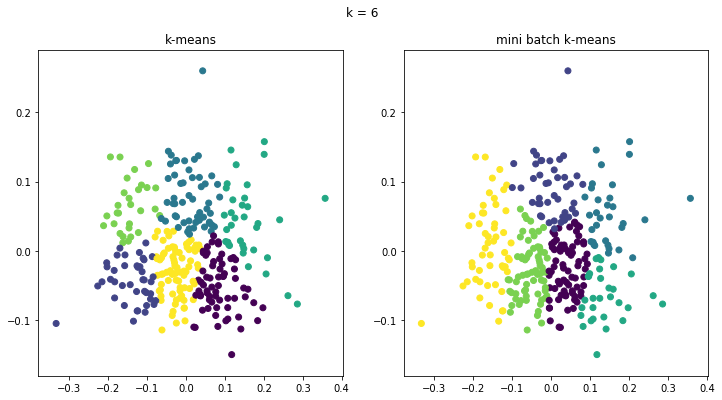

comparing k-means clusters against the data
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4   5
row_0                        
0      40   0   9   0   0  26
1       0   0  41   0   3   0
2       0   0   1  31   0   0
3      26   0   0   4   0   0
4       0  13   3   0   2  52
5       0  28   0   0  24   0


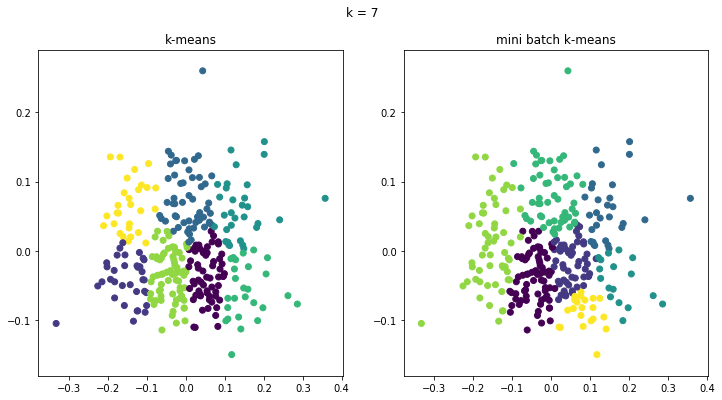

comparing k-means clusters against the data
col_0   0   1
row_0        
0      14  48
1      19  15
2      34  20
3      16  15
4       3  23
5      31  37
6      22   6

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4   5   6
row_0                            
0       1   4   1   0   0  67   0
1      48   0   3   1   1   0   0
2       0   0   0  29   0   0   0
3       0   0   0   0  17   0   0
4       0   0  50   1   0   0   2
5       0  30   0   0   0   1  26
6      13   0   0   0   8   0   0


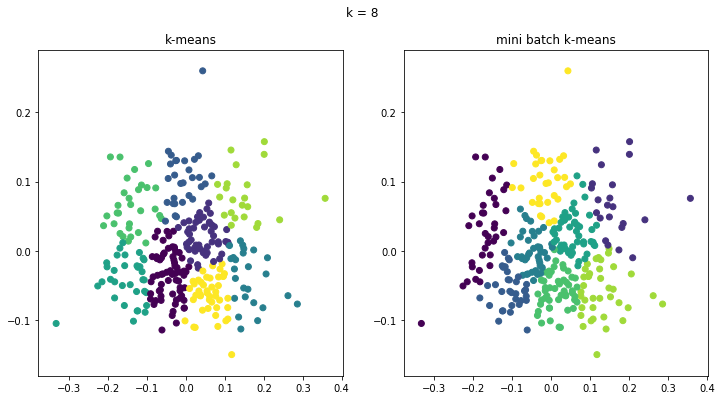

comparing k-means clusters against the data
col_0   0   1
row_0        
0      32  35
1      22  29
2      17  12
3       5  20
4      19  15
5      24   6
6      12  10
7       8  37

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4   5   6   7
row_0                                
0       0   0   0   0  13  23   0   0
1       0   0   0   4   0   0  18   0
2      12   0   0   0  21   0   0   0
3      34   3   1   0   0   4   0   0
4       0  42   1   1   0   0   4   1
5      21   4   0   0   0   0   0  26
6       0   0   0  20   0   0   0  18
7       0   2  27   0   0   3   0   0


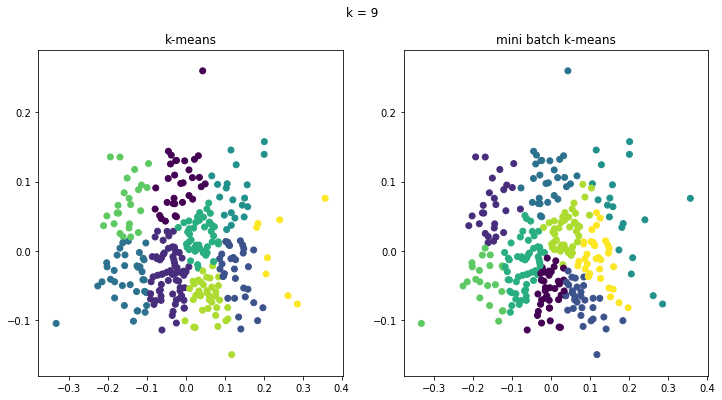

comparing k-means clusters against the data
col_0   0   1
row_0        
0      19  13
1      32  35
2       8  24
3      20  16
4      13   7
5      20  25
6      20   4
7       6  33
8       1   7

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4   5   6   7  8
row_0                                   
0       0  25   0   0   0   2   0  10  0
1       1   0   0   2   0   0  24   0  0
2       0   0   5   0   0   0   0  28  0
3      28   0   0   0   1   0   0   0  0
4       0   0   1   0  11   0   0   0  8
5       3  42   0  12   0   0   0   0  0
6       0   0   0  22   0   0   0   0  0
7       0   0   0   0   4  40   0   0  0
8       0   0  26   0   4   3   0   1  0


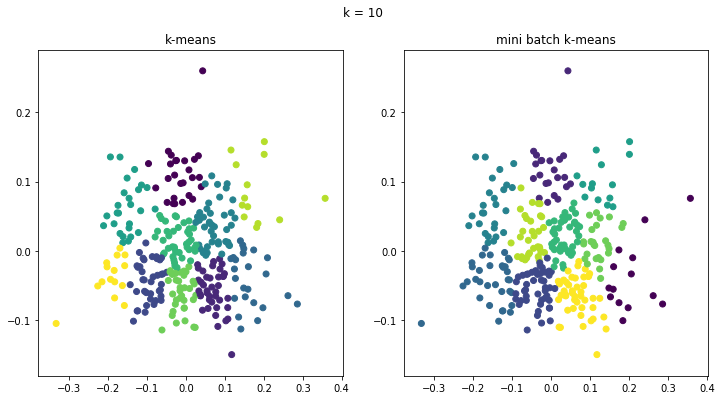

comparing k-means clusters against the data
col_0   0   1
row_0        
0      15  11
1       7  34
2      15  24
3       4  20
4      23  20
5      20   6
6      23  18
7      14  21
8       7   6
9      11   4

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4   5   6   7  8   9
row_0                                       
0       0   0   0  12   0   0   0   0  2   0
1      21   0   0   0   1   0   0   0  0   0
2       0   0  15   0   0   0   4  28  0   0
3       0   0  18   0   0   0   0   0  0  15
4       1   0   0   0   0  25   0   0  0   0
5       0   0   0   0   6   0   0   0  8   0
6       0   2   0   0  24   0  15   1  0   0
7       0   2   0   9  12   0   0   0  3   0
8       4   0   6   0   0   1  22   0  0   0
9       0  37   0   3   0   0   0   6  0   0


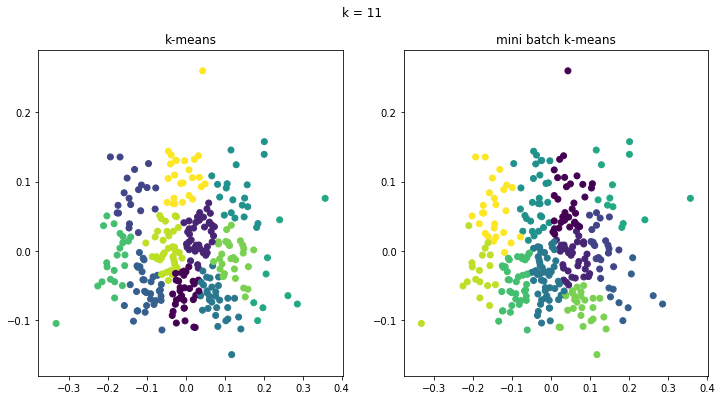

comparing k-means clusters against the data
col_0   0   1
row_0        
0      11  21
1      18  23
2      17   3
3      11  21
4       5  28
5      13   7
6       0   9
7      16   6
8       9  21
9      25  14
10     14  11

comparing k-means and mini batch k-means solutions
col_0  0   1   2   3   4   5   6   7   8   9   10
row_0                                            
0       0  19   0   0   0   5   0   0   0   0  10
1       1  16   0   0   7   0   0   0  10   0   0
2       0   0   0   0   0   4   0   0  17   0   0
3       0   0   0   0   0   0   7   0   3   0   0
4      29   5   0   0   0   0   0   0   0  17   0
5       0   1   3   0   0   0   0   0   0  11  15
6       0   0   0   0   0  11   2   0   0   0   0
7       0   0   0  29   0   0   0   0   0   9   0
8       2   0   0   0  26   0   0   0   0   0   0
9       0   0   0   2   0   0   0  16   0   0   0
10      0   0  17   1   0   0   0   6   0   2   0


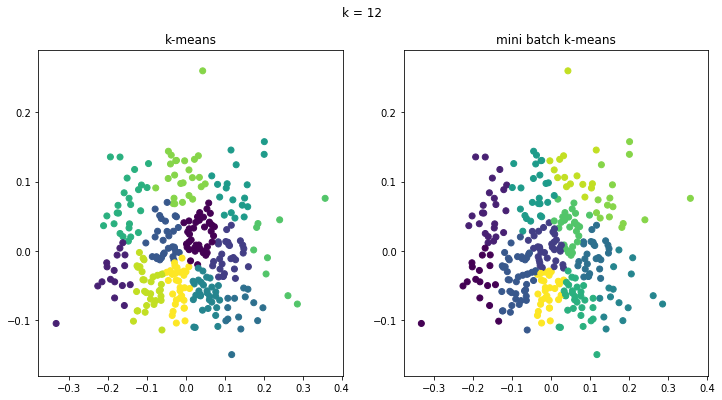

comparing k-means clusters against the data
col_0   0   1
row_0        
0      18  22
1      12   5
2       8  20
3      21   9
4       2  12
5       6  26
6      12   6
7      20   5
8       1   8
9      14  11
10     11  21
11     14  19

comparing k-means and mini batch k-means solutions
col_0  0   1   2   3   4   5   6   7   8   9   10  11
row_0                                                
0       0  16   0   0   0   0   0   0   0   0   1   0
1       0   1   0   0   0   0   0  23   0   0   0   0
2      14   0   0  13   0   1   0   0   0   0   0   5
3       0   0   0   9   0   0   0   0   0   0  31   4
4       0   0  27   0   0   0   0   0   0   0   0   0
5       0   0   1   0   9   0   0   0   5   0   0   0
6       0   0   0   8   0   0   0   2   0  15   0   0
7       0   0   0   0   5  26   0   0   0   0   0   0
8      26   0   0   0   0   0   1   0   0   1   0   0
9       0   0   0   0   0   0  11   0   4   0   0   0
10      0   0   0   0   0   0   6   0   0   9   0   0
11    

In [11]:
k_vals = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for k in k_vals:
    
    # full kmeans:
    y_pred = KMeans(n_clusters = k, random_state=42).fit_predict(X_pca)
    
    #minibatch:
    minibatchkmeans = MiniBatchKMeans(init='random',
                                      n_clusters=k,
                                      batch_size=200)
    minibatchkmeans.fit(X_pca)
    mini_pred = minibatchkmeans.predict(X_pca)
    
    #plots
    plt.figure(figsize=(12, 6))
    plt.suptitle('k = {}'.format(k))
    plt.subplot(121)
    plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_pred)
    plt.title('k-means')
    plt.subplot(122)
    plt.title('mini batch k-means')
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mini_pred)
    plt.show()

    print('comparing k-means clusters against the data')
    print(pd.crosstab(y_pred, y))
    print('\ncomparing k-means and mini batch k-means solutions')
    print(pd.crosstab(mini_pred, y_pred))